In [1]:
from scipy.constants import k as k_B, pi
from scipy.integrate import quad
from scipy.misc import derivative

In [2]:
def minus_log_delta_over_delta0(E, f):
    pass

def integrand(E, Delta, f, dx=1e-6):
    fE = f(E)
    try:
        dfdE = np.array([derivative(func=f, x0=e, dx=dx) for e in E])
    except TypeError:
        dfdE = derivative(func=f, x0=E, dx=dx)
    return 2 * (1 - Delta**2 / E**2)**(1/2) * (fE / E - dfdE)

def fermi_dirac(tau):
    def FD(E):
        return (np.exp(E / tau) + 1)**-1
    return FD

def numerical(Delta, f, epsabs=1e-12, epsrel=1e-12, limit=10000):
    return quad(integrand, Delta, 20 * Delta, args=(Delta, f),
                epsabs=epsabs, epsrel=epsrel, limit=limit)

In [3]:
Delta = 1
tau = 0.1
EE = Delta * np.linspace(1, 5, 1000)

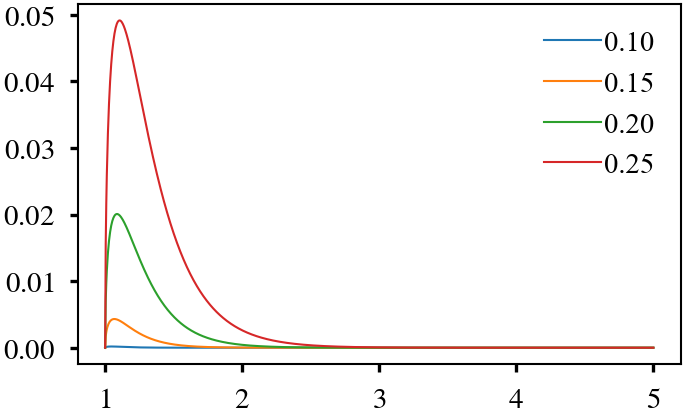

In [4]:
taus = [0.1, 0.15, 0.2, 0.25]
fig, ax = plt.subplots()

for tau in taus:
    ax.plot(EE, integrand(EE, Delta, fermi_dirac(tau)), label='{:.2f}'.format(tau))

ax.legend(loc='best')

In [5]:
TT = np.linspace(0.05, 0.5, 100)
II = np.array([numerical(Delta, fermi_dirac(T))[0] for T in TT])

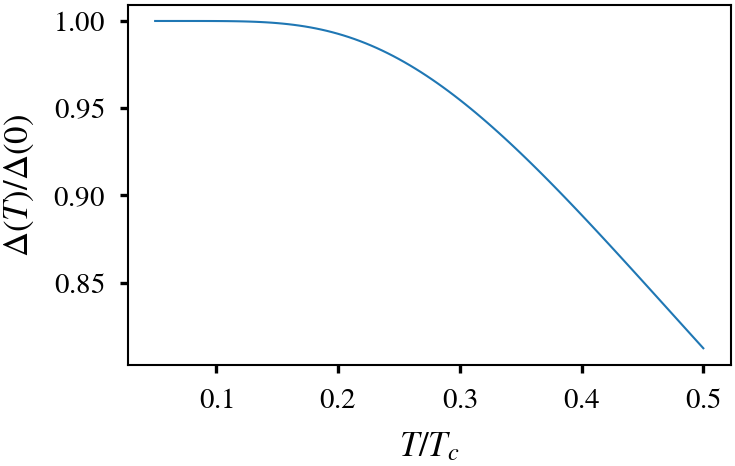

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel('$T / T_c$')
ax.set_ylabel('$\Delta(T) / \Delta(0)$')
ax.plot(TT, np.exp(-II))